# Subcellular location data from the Human Protein Atlas

Exploring protein expression data from the Cell Atlas section of the [Human Protein Atlas](https://www.proteinatlas.org/).

Emma Hatton-Ellis, Jan 2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Read the tsv file directly from the HPA site. The GO terms are dumped as a single string so these need to be separated on import.

In [2]:
hpa = pd.read_csv('https://www.proteinatlas.org/download/subcellular_location.tsv.zip',
                  sep='\t',
                  compression='zip',
                  converters={'GO id': lambda x: x.split(';')})

In [3]:
hpa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12390 entries, 0 to 12389
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gene                             12390 non-null  object
 1   Gene name                        12390 non-null  object
 2   Reliability                      12390 non-null  object
 3   Main location                    12390 non-null  object
 4   Additional location              4504 non-null   object
 5   Extracellular location           582 non-null    object
 6   Enhanced                         1601 non-null   object
 7   Supported                        4306 non-null   object
 8   Approved                         7304 non-null   object
 9   Uncertain                        1062 non-null   object
 10  Single-cell variation intensity  2122 non-null   object
 11  Single-cell variation spatial    219 non-null    object
 12  Cell cycle dependency           

In [4]:
hpa.head()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
0,ENSG00000000003,TSPAN6,Approved,Cell Junctions;Cytosol,Nucleoli fibrillar center,NaN,NaN,NaN,Cell Junctions;Cytosol;Nucleoli fibrillar center,NaN,Cytosol,NaN,NaN,"[Cell Junctions (GO:0030054), Cytosol (GO:0005..."
1,ENSG00000000457,SCYL3,Uncertain,Microtubules,Nuclear bodies,NaN,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,"[Microtubules (GO:0015630), Nuclear bodies (GO..."
2,ENSG00000000460,C1orf112,Approved,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,[Mitochondria (GO:0005739)]
3,ENSG00000000938,FGR,Approved,Plasma membrane,Aggresome,NaN,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,"[Aggresome (GO:0016235), Plasma membrane (GO:0..."
4,ENSG00000000971,CFH,Approved,Vesicles,NaN,Predicted to be secreted,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,[Vesicles (GO:0043231)]


In [6]:
hpa.Gene.count()

12390

Extract genes with only a single subcellular location into a separate dataframe.

In [7]:
hpa_single_location = hpa[hpa['GO id'].str.len() == 1]

In [10]:
hpa_single_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5743 entries, 2 to 12389
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gene                             5743 non-null   object
 1   Gene name                        5743 non-null   object
 2   Reliability                      5743 non-null   object
 3   Main location                    5743 non-null   object
 4   Additional location              0 non-null      object
 5   Extracellular location           305 non-null    object
 6   Enhanced                         956 non-null    object
 7   Supported                        1756 non-null   object
 8   Approved                         2701 non-null   object
 9   Uncertain                        330 non-null    object
 10  Single-cell variation intensity  778 non-null    object
 11  Single-cell variation spatial    8 non-null      object
 12  Cell cycle dependency            

Make another dataframe for genes with multiple locations.

In [11]:
hpa_multi_location = hpa[hpa['GO id'].str.len() > 1]

In [12]:
hpa_multi_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6647 entries, 0 to 12385
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gene                             6647 non-null   object
 1   Gene name                        6647 non-null   object
 2   Reliability                      6647 non-null   object
 3   Main location                    6647 non-null   object
 4   Additional location              4504 non-null   object
 5   Extracellular location           277 non-null    object
 6   Enhanced                         645 non-null    object
 7   Supported                        2550 non-null   object
 8   Approved                         4603 non-null   object
 9   Uncertain                        732 non-null    object
 10  Single-cell variation intensity  1344 non-null   object
 11  Single-cell variation spatial    211 non-null    object
 12  Cell cycle dependency            

Clean up the GO terms column which is currently a list.

In [13]:
hpa_single_location = hpa_single_location.copy() # make a copy to remove chained assignment error
hpa_single_location['GO'] = hpa['GO id'].apply(lambda x: x[0])

In [14]:
hpa_single_location.drop('GO id', axis=1, inplace=True)

In [15]:
hpa_single_location.head()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO
2,ENSG00000000460,C1orf112,Approved,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria (GO:0005739)
4,ENSG00000000971,CFH,Approved,Vesicles,NaN,Predicted to be secreted,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,Vesicles (GO:0043231)
6,ENSG00000001167,NFYA,Supported,Nucleoplasm,NaN,NaN,NaN,Nucleoplasm,NaN,NaN,NaN,NaN,NaN,Nucleoplasm (GO:0005654)
7,ENSG00000001460,STPG1,Approved,Nucleoplasm,NaN,NaN,NaN,NaN,Nucleoplasm,NaN,NaN,NaN,NaN,Nucleoplasm (GO:0005654)
8,ENSG00000001461,NIPAL3,Approved,Nucleoplasm,NaN,NaN,NaN,NaN,Nucleoplasm,NaN,NaN,NaN,NaN,Nucleoplasm (GO:0005654)


Count the number of annotations to each subcellular location and plot on a simple graph. Unsurprisingly, "Nucleoplasm" and "Cytosol" are the most common locations.

In [18]:
hpa_single_location.groupby('GO').count()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency
GO,,,,,,,,,,,,,
Actin filaments (GO:0015629),33,33,33,33,0,4,2,8,18,5,8,1,0
Cell Junctions (GO:0030054),52,52,52,52,0,2,3,22,25,2,2,0,0
Centriolar satellite (GO:0034451),22,22,22,22,0,2,1,6,14,1,2,0,0
Centrosome (GO:0005813),95,95,95,95,0,2,9,26,56,4,3,0,0
Cytokinetic bridge (GO:0045171),2,2,2,2,0,0,0,1,1,0,2,0,2
Cytoplasmic bodies (GO:0036464),13,13,13,13,0,0,1,6,4,2,2,0,0
Cytosol (GO:0005829),974,974,974,974,0,50,133,287,493,61,111,1,5
Endoplasmic reticulum (GO:0005783),231,231,231,231,0,29,32,86,109,4,26,0,1
Endosomes (GO:0005768),4,4,4,4,0,0,2,0,2,0,0,0,0


<AxesSubplot:xlabel='GO'>

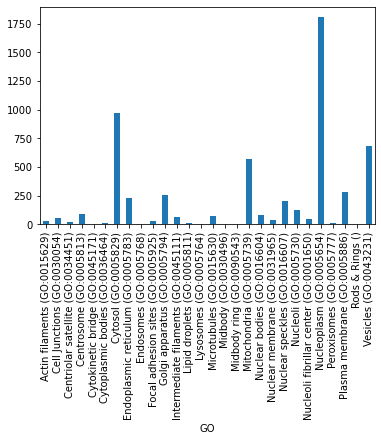

In [19]:
hpa_single_location.groupby('GO').count().Gene.plot(kind='bar')

In [20]:
hpa_single_location.GO.nunique()

28

How many high-quality annotations are there?

Information about the four reliability categories (Approved, Enhanced, Supported and Uncertain) can be found on the [HPA website](https://www.proteinatlas.org/about/assays+annotation#if_reliability_score).

In [21]:
hpa_single_location.groupby('Reliability').count()

,Gene,Gene name,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO
Reliability,,,,,,,,,,,,,
Approved,2695,2695,2695,0,217,0,3,2692,0,326,2,11,2695
Enhanced,945,945,945,0,23,942,3,0,0,183,3,13,945
Supported,1771,1771,1771,0,58,14,1750,7,0,235,2,10,1771
Uncertain,332,332,332,0,7,0,0,2,330,34,1,3,332


<AxesSubplot:xlabel='Reliability'>

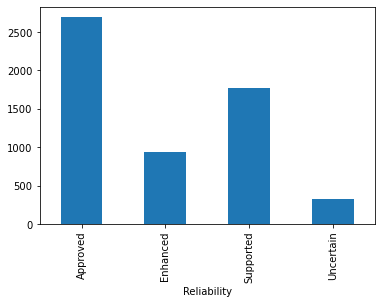

In [17]:
hpa_single_location.groupby('Reliability').count().Gene.plot(kind='bar')

In [22]:
hpa_multi_location.head()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id
0,ENSG00000000003,TSPAN6,Approved,Cell Junctions;Cytosol,Nucleoli fibrillar center,NaN,NaN,NaN,Cell Junctions;Cytosol;Nucleoli fibrillar center,NaN,Cytosol,NaN,NaN,"[Cell Junctions (GO:0030054), Cytosol (GO:0005..."
1,ENSG00000000457,SCYL3,Uncertain,Microtubules,Nuclear bodies,NaN,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,"[Microtubules (GO:0015630), Nuclear bodies (GO..."
3,ENSG00000000938,FGR,Approved,Plasma membrane,Aggresome,NaN,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,"[Aggresome (GO:0016235), Plasma membrane (GO:0..."
5,ENSG00000001084,GCLC,Approved,Nucleoplasm,Cytosol;Nucleoli,NaN,NaN,NaN,Cytosol;Nucleoli;Nucleoplasm,NaN,NaN,NaN,NaN,"[Cytosol (GO:0005829), Nucleoli (GO:0005730), ..."
9,ENSG00000001497,LAS1L,Approved,Nucleoplasm,Centriolar satellite;Cytosol,NaN,NaN,Nucleoplasm,Centriolar satellite;Cytosol,NaN,NaN,NaN,NaN,"[Centriolar satellite (GO:0034451), Cytosol (G..."


Add a column with a count of the annotated locations to the original hpa dataframe.

In [25]:
hpa['location_count'] = hpa.apply(lambda x: len(x['GO id']), axis=1)

In [26]:
hpa.head()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id,location_count
0,ENSG00000000003,TSPAN6,Approved,Cell Junctions;Cytosol,Nucleoli fibrillar center,NaN,NaN,NaN,Cell Junctions;Cytosol;Nucleoli fibrillar center,NaN,Cytosol,NaN,NaN,"[Cell Junctions (GO:0030054), Cytosol (GO:0005...",3
1,ENSG00000000457,SCYL3,Uncertain,Microtubules,Nuclear bodies,NaN,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,"[Microtubules (GO:0015630), Nuclear bodies (GO...",2
2,ENSG00000000460,C1orf112,Approved,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,[Mitochondria (GO:0005739)],1
3,ENSG00000000938,FGR,Approved,Plasma membrane,Aggresome,NaN,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,"[Aggresome (GO:0016235), Plasma membrane (GO:0...",2
4,ENSG00000000971,CFH,Approved,Vesicles,NaN,Predicted to be secreted,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,[Vesicles (GO:0043231)],1


How are the location counts distributed?

In [27]:
hpa['location_count'].min(), hpa['location_count'].max()

(1, 6)

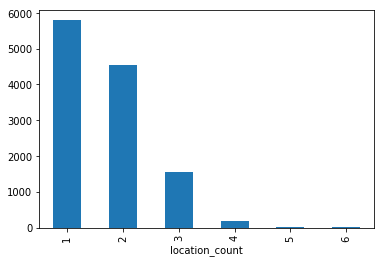

In [45]:
hpa.groupby('location_count').count().Gene.plot(kind='bar')

How many genes share the same locations? To allow this comparison, the location GO terms are re-joined into a single string which is added as a new column onto the dataframe.

In [36]:
hpa['string_locations'] = hpa.apply(lambda x: ';'.join(i for i in sorted(x['GO id'])), axis=1)

In [37]:
hpa.head()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id,location_count,string_locations
0,ENSG00000000003,TSPAN6,Approved,Cell Junctions;Cytosol,Nucleoli fibrillar center,NaN,NaN,NaN,Cell Junctions;Cytosol;Nucleoli fibrillar center,NaN,Cytosol,NaN,NaN,"[Cell Junctions (GO:0030054), Cytosol (GO:0005...",3,Cell Junctions (GO:0030054);Cytosol (GO:000582...
1,ENSG00000000457,SCYL3,Uncertain,Microtubules,Nuclear bodies,NaN,NaN,NaN,NaN,Microtubules;Nuclear bodies,NaN,NaN,NaN,"[Microtubules (GO:0015630), Nuclear bodies (GO...",2,Microtubules (GO:0015630);Nuclear bodies (GO:0...
2,ENSG00000000460,C1orf112,Approved,Mitochondria,NaN,NaN,NaN,NaN,Mitochondria,NaN,NaN,NaN,NaN,[Mitochondria (GO:0005739)],1,Mitochondria (GO:0005739)
3,ENSG00000000938,FGR,Approved,Plasma membrane,Aggresome,NaN,NaN,NaN,Aggresome;Plasma membrane,NaN,NaN,NaN,NaN,"[Aggresome (GO:0016235), Plasma membrane (GO:0...",2,Aggresome (GO:0016235);Plasma membrane (GO:000...
4,ENSG00000000971,CFH,Approved,Vesicles,NaN,Predicted to be secreted,NaN,NaN,Vesicles,NaN,NaN,NaN,NaN,[Vesicles (GO:0043231)],1,Vesicles (GO:0043231)


In [38]:
locations = hpa[hpa['GO id'].str.len() > 1].groupby('string_locations').count()
locations.head()

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id,location_count
string_locations,,,,,,,,,,,,,,,
Actin filaments (GO:0015629);Cell Junctions (GO:0030054);Cytosol (GO:0005829),1,1,1,1,1,0,0,1,0,0,1,0,0,1,1
Actin filaments (GO:0015629);Cell Junctions (GO:0030054);Nucleoplasm (GO:0005654);Plasma membrane (GO:0005886),1,1,1,1,1,0,0,0,0,1,1,0,0,1,1
Actin filaments (GO:0015629);Cell Junctions (GO:0030054);Plasma membrane (GO:0005886),3,3,3,3,2,0,0,3,2,0,0,0,0,3,3
Actin filaments (GO:0015629);Centriolar satellite (GO:0034451),1,1,1,1,0,0,0,0,0,1,1,0,0,1,1
Actin filaments (GO:0015629);Centrosome (GO:0005813),2,2,2,2,2,0,0,1,2,0,0,0,0,2,2


In [32]:
locations[locations.Gene > 100]

,Gene,Gene name,Reliability,Main location,Additional location,Extracellular location,Enhanced,Supported,Approved,Uncertain,Single-cell variation intensity,Single-cell variation spatial,Cell cycle dependency,GO id,location_count
string_locations,,,,,,,,,,,,,,,
Cytosol (GO:0005829);Nucleoplasm (GO:0005654),1012,1012,1012,1012,657,27,109,398,626,80,121,56,3,1012,1012
Cytosol (GO:0005829);Nucleoplasm (GO:0005654);Plasma membrane (GO:0005886),182,182,182,182,155,10,18,78,126,28,30,7,2,182,182
Cytosol (GO:0005829);Plasma membrane (GO:0005886),339,339,339,339,107,15,45,132,199,37,55,2,6,339,339
Cytosol (GO:0005829);Vesicles (GO:0043231),115,115,115,115,53,11,12,45,80,9,23,0,0,115,115
Golgi apparatus (GO:0005794);Nucleoplasm (GO:0005654),162,162,162,162,112,6,15,61,127,14,14,2,0,162,162
Golgi apparatus (GO:0005794);Vesicles (GO:0043231),110,110,110,110,47,17,9,33,76,8,12,0,0,110,110
Mitochondria (GO:0005739);Nucleoplasm (GO:0005654),181,181,181,181,113,1,12,70,136,21,48,5,5,181,181
Nuclear bodies (GO:0016604);Nucleoplasm (GO:0005654),194,194,194,194,116,2,41,89,80,3,36,9,2,194,194
Nucleoli (GO:0005730);Nucleoplasm (GO:0005654),302,302,302,302,169,6,54,107,168,15,125,20,6,302,302


Next steps: compare with UniProt data.